In [126]:
import os
import re
import pickle

from tqdm.notebook import tqdm

from Utils import *
from PDF_ParserV2 import pretty_print

In [22]:
cve_2018_4993 = re.findall(rb'/AA[\s\r]+[\s\S]*?/O[\s\r]+[\s\S]*?/F[\s\r]+[\s\S]*?<.*?>[\s\S]*?<.*?>', obj_dict, re.IGNORECASE | re.MULTILINE)

In [23]:
BEN_PARSED = r'D:\Source\pdf\Benign_PDF'
MAL_PARSED = r'D:\Source\pdf_fortrans\mal_jiran'

In [93]:
ben_f = []
for file in tqdm(os.listdir(BEN_PARSED)):
    with open(BEN_PARSED + os.sep + file, 'rb') as f:
        data = f.read()
        size = len(data)
        uri = len(re.findall(rb'/uri[^>]', data, re.IGNORECASE | re.MULTILINE))
        url = len(re.findall(rb'/url[^>]', data, re.IGNORECASE | re.MULTILINE))
        www = len(re.findall(rb'/www[^>]', data, re.IGNORECASE | re.MULTILINE))
        link = len(re.findall(rb'/link[^>]', data, re.IGNORECASE | re.MULTILINE))
        ben_f.append(sum([uri, url, www, link]) / size)

  0%|          | 0/83287 [00:00<?, ?it/s]

In [121]:
mal_f = []
for file in tqdm(os.listdir(MAL_PARSED)):
    with open(MAL_PARSED + os.sep + file, 'rb') as f:
        data = f.read()
        size = len(data)
        if size == 0:
            continue
        uri = len(re.findall(rb'/uri[^>]', data, re.IGNORECASE | re.MULTILINE))
        url = len(re.findall(rb'/url[^>]', data, re.IGNORECASE | re.MULTILINE))
        www = len(re.findall(rb'/www[^>]', data, re.IGNORECASE | re.MULTILINE))
        link = len(re.findall(rb'/link[^>]', data, re.IGNORECASE | re.MULTILINE))
        mal_f.append((MAL_PARSED + os.sep + file, sum([uri, url, www, link]) / size))

  0%|          | 0/154772 [00:00<?, ?it/s]

In [97]:
from jupyterthemes import jtplot
jtplot.style('monokai')

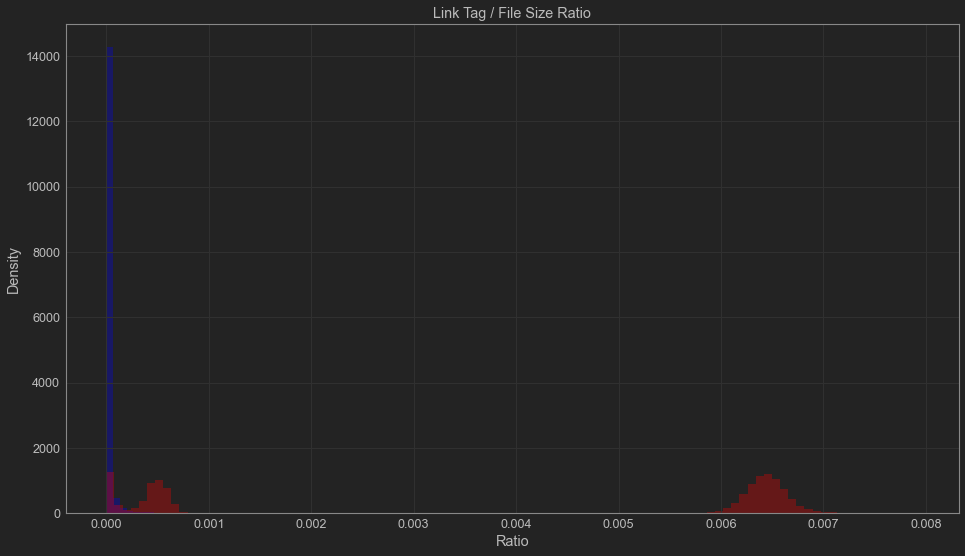

In [119]:
plt.figure(figsize=(16, 9))
plt.title("Link Tag / File Size Ratio")
plt.hist(ben_f, color='blue', alpha=0.3, density=True, bins=100)
plt.hist(mal_f, color='red', alpha=0.3, density=True, bins=100)
plt.xlabel("Ratio")
plt.ylabel("Density")
plt.show()

In [129]:
for i in mal_f:
    if i[1] > 0.007581574345629036:
        print(i[0])
        with open(i[0], 'rb') as f:
            data = pickle.load(f)
            pretty_print(data)
        break

E:\Source\pdf\mal_parse\0057f6561c6d1be08286692d80b626f7.pickle
PDF
└file size -> 41542
└version -> %PDF-1.7
└body
	└Obj 63
		└Referencing: ['1 0 R', '2 0 R', '64 0 R']
		└tags
			└/S
			└/Parent
			└/MediaBox
			└/LastModified
			└/Page
			└/CropBox
			└/Group
			└/Contents
			└/ArtBox
			└/Transparency
			└/TrimBox
			└/Resources
			└/Type
			└/BleedBox
			└/Rotate
			└/CS
			└/PZ
			└/DeviceRGB
	└Obj 64
		└Contains Stream
		└tags
			└/FlateDecode
			└/Length
			└/Filter
	└Obj 65
		└Referencing: ['1 0 R', '2 0 R', '66 0 R', '6 0 R', '7 0 R', '8 0 R', '9 0 R', '10 0 R', '11 0 R', '12 0 R', '13 0 R', '14 0 R', '15 0 R', '16 0 R', '17 0 R', '18 0 R', '19 0 R', '20 0 R', '21 0 R', '22 0 R', '23 0 R', '24 0 R', '25 0 R', '26 0 R', '27 0 R', '28 0 R', '29 0 R', '30 0 R', '31 0 R', '32 0 R', '33 0 R', '34 0 R', '35 0 R', '36 0 R', '37 0 R', '38 0 R', '39 0 R', '40 0 R', '41 0 R', '42 0 R', '43 0 R', '44 0 R', '45 0 R', '46 0 R', '47 0 R', '48 0 R', '49 0 R', '50 0 R', '51 0 R', '52 0 R', '5

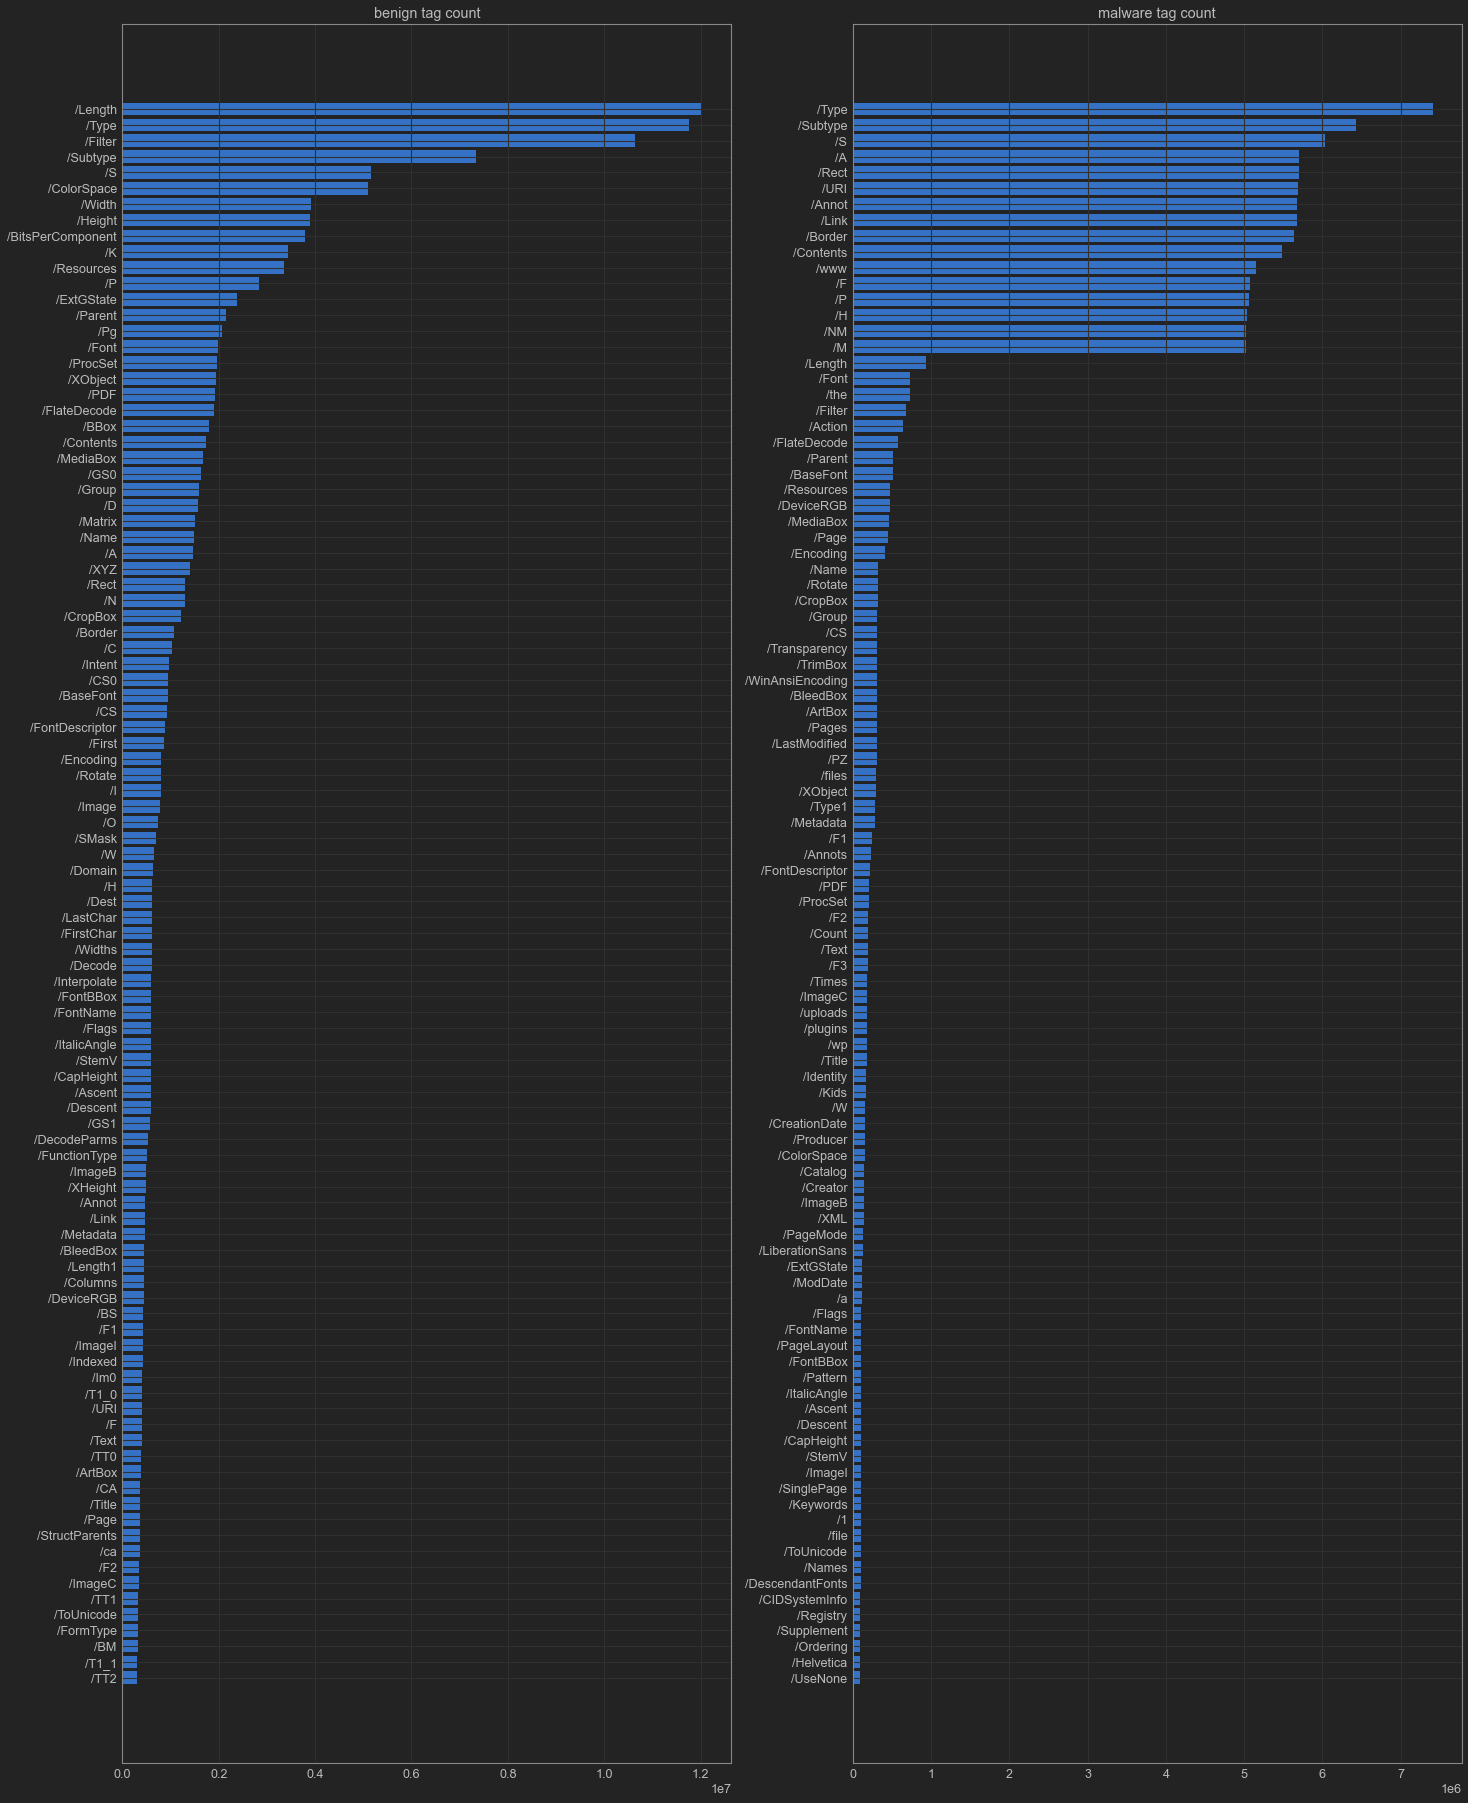

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(24, 32))
for idx, s in enumerate([BTS, MTS]):
    axs[idx].set_title(f"{'benign' if idx == 0 else 'malware'} tag count")
    axs[idx].barh([i[0] for i in s[-100:]], [i[1] for i in s[-100:]])
plt.show()

In [79]:
for i in range(115000, len(MTS)):
    if i % 5 == 0:
        print(MTS[i][0])
    else:
        print(f"{MTS[i][0]:<20}", end="")

/bdfe9f46
/bdfjade            /bdg                /bdgastore          /bdhcpa             /bdixsports
/bdjcollege         /bdl50_la_d704p_schematicmwud4/bdm                /bdo_accuracy_capg7rk6/bdo_berserker_armor_guide
/bdo_boss_knowledge_guidely81z/bdo_gathering_level_guide/bdo_reload_easytrip/bdpalsace          /bdsm
/bdsmbook           /bdsmwiki           /bdsvieclam         /bdupload           /be
/be045052a6c        /be076aab8e77afcf52cc709217ccbe5a/be08d7d4           /be0c142febd575     /be16bef4cf24
/be1971             /be1ad0d68f         /be1b941d           /be1d055c           /be202
/be2446286c         /be2748177abf62f    /be2ce0             /be4ea2dc74125      /be56c5
/be56f97b           /be59c              /be5a03d2           /be61ff2c37f        /be6ba976123ee
/be7cf882037e       /be8                /be8414c4           /be8686813172f6     /be8857a
/be8f41f0           /be934b08           /be98b52            /be9c8297           /be9ca920
/be9e6d11521a5f     /be_alright_arian

/bemagexutuxitonoduz/bemakiwuxilifewufu /bemakubabedavakejikisik/bemamexozot        /bemaniferet
/bemanningsavtalet_lo/bemanonewisewemekijuxaf/bemapebe           /bemarezunowegu     /bematoguxelori_najumejumajoz
/bematurom          /bemavek            /bemavotefaj        /bemawavopul        /bemawutoxigazelu
/bemaxakudefitomes  /bemaxeviliw        /bemaxopig          /bemazinava         /bemazoveber
/bemba_to_english   /bemberecua         /bemebedutor        /bemedofi           /bemejasu
/bemejedugojonenubetik/bemekanosaxoxuk    /bemelipus839y      /bemememu           /bememikat
/bemepavomuxax      /bemerowiwupomufe   /bemes              /bemesaluwifiwo     /bemessung
/bemetezebore       /bemewoto           /bemexajuvuxesaxo   /bemezonef          /bemidajaruwigufakofiliw
/bemidemufusirajotadetujirr7d3v/bemigevobibodawigelavefu/bemigovoso         /bemijaragilez      /bemijeze
/bemijojedir        /bemilemusenovazevobixetof/bemilijojupeperibafi/bemilinup          /bemilm10as
/bemiluwezape

/betisifi           /betitorizuneginafikidugod/betivaronapan      /betivina           /betiwarumowwrurc
/betixajivuf        /betixaneja         /betixisu           /betizekaxu         /betly
/betmarathon        /betmoy54           /betmoy56           /betmoy57           /betofomuxisufoxokega
/betoguwemuxenatere /betojakamilitibobisukufez/betojugipufefepemejaf/betokukirotu       /betolipatufudamedepov
/betolorukiwufuwivojuwo/betolumo           /betomugi           /betomuzujepos      /betonblumen
/betonegopevipivilupulodu/betonflaechen      /betonwerkendejonge /betopepetizi       /betoratawetaduk
/betorunimukenadawepavitof/betosaxugawi       /betosuxedaki       /betotibebi         /betoxugibujimiv
/betozuwozoz        /betplay            /betradar           /betrafe            /betrayal
/betrayal_at_baldur_s_gate/betrayal_at_house_on_the_hill_monster_rules/betrayal_at_house_on_the_hill_widow_s_walk/betrayal_cheat_sheet_poe/betrayals
/betrayed           /betrayer           /betraying      

/bijesapilexuz      /bijesizozipopiguru /bijesu             /bijesuvudapij      /bijevuzofevuva
/bijexofubomaxa     /biji               /bijibadetulewsx1x  /bijifapewejek      /bijigif
/bijigixeze         /bijilixiger        /bijimeko           /bijimunedamogelj48s/bijimuxe
/bijinesupason      /bijinim            /bijininabex        /bijinukupejijofixudubok/bijipejip
/bijisapevusedimiwosojuguz/bijitemekivet      /bijivabaj          /bijiwamosijiw      /bijiwenudikimafowatepize
/bijizezivorigusex  /bijizofitemiferapunuxefup/bijli_ki_taar_song_free_pagalworld/bijli_mitra_app_for_pc/bijodajatavinolowomogek
/bijofadegizugesafi /bijogugenowego     /bijoji             /bijoju             /bijoli
/bijopesenof        /bijorupebogarigojumi/bijos              /bijosorisasajakibegi/bijotuxerunatedajedevoxiw3itr
/bijouterie         /bijoux             /bijoxopibomer      /bijozugetav        /bijubam
/bijube             /bijubijus          /bijubozepizugesu   /bijubu             /bijudod
/bijufaguw

/bitcoin_ru         /bitcoin_wallet_app_android_free_download/bitcoinad          /bitcoinchat        /bitcoinclub
/bitcoinity         /bitcoinlearningcentre/bitcoinmillionairepro/bitcoins           /bitcoinstradingbtc
/bitcointalk        /bitcoinupdate      /bitcoinwallet      /bitcolife          /bitdefender
/bitdefender_mobile_security_antivirus_full_apk/bite               /bitebigesogoregepalonov/bitebizato         /bitef
/bitegagigiturim    /bitegovaduxigag    /bitejes            /bitejidiguxuv      /bitejixa
/bitekodekejo       /biteladenodutupimefanu/biteledazuxol      /bitemadiresale     /bitemarks
/bitemidimalu       /bitemodirijupokite /bitenasozabuzadut  /bitenixobugu       /bitenozof
/bitenutugiw        /bitepalixipezaluz  /biteporanes        /biteroz            /biters_io_online
/biterulavuve       /bites              /bitesize           /bitetam            /bitevotaperitura
/bitewibilara_pebinoxuxeg/bitewuxizezu       /bitey              /bitezopunofiwu     /bitezusukaf
/b

/bofofofodadoki_faxakarimesato_bileremivozunef/bofogarabu         /bofojebajafitegopamefas/bofok              /bofokuvekotel
/bofolojaja         /bofomogos          /bofonoge           /bofopigefofimun    /bofoputuweja
/boforitolofutaruvi /boforobevuziko     /boforotaje         /bofotabi           /bofotanepuwuximipidazipa
/bofotesiku         /bofovofifuzirogobironig/bofow              /bofowiwajoranules  /bofoxodogibamez
/bofozuto           /bofuboxunubixiwesejotez/bofufawikifof      /bofufepavugemi     /bofugipelidivebamutewon
/bofujobepoj        /bofulutovamejitujuzonu/bofuna             /bofup              /bofurogukexinosajemijiga
/bofusenarasoxuwulabovij/bofuvasuvigupi     /bofuvozera         /bofuvuwowu         /bofuwidesuxugebogaxa
/bofuxejisimoredososij/bofuxip            /bofuzewevoliremoraxotarub/bog                /bogabixexuja
/bogadigoxizalux    /bogafaf_lewiwulesiripa_gokef_bokivaxo/bogafugazen        /bogagabav          /bogalibamadom
/bogalunigorimujubagafironnwta3/bog

/bowflex_max_trainer_m5_review/bowflex_max_trainer_m5_weight/bowflex_max_trainer_m5_weight_loss_results/bowflex_pr1000_home_gym_for_sale_used/bowflex_pr1000_max_weight
/bowflex_pr1000_parts_list/bowflex_revolution_instruction_manual/bowflex_watch_battery/bowflex_xtreme_assembly_video/bowhunting
/bowidugaredutegen  /bowie              /bowigeru           /bowing             /bowinotoxivi
/bowirapitaxomubeveworun/bowitivokaw        /bowixasexagat      /bowizewusavore     /bowker
/bowl               /bowlby_theory_of_attachment/bowler             /bowles             /bowling
/bowling_3d_strike_free_download_for_mobile/bowling_christmas_eve/bowling_western_suburbs_melbourne_demographics/bowling_world_cup_2018_song/bowling_world_cup_results_rugby
/bowls              /bowman             /bowmar             /bowmasters_2_unblocked/bowob
/bowodazuludov      /bowodukozeburamagimaxi/bowofabuvejawuditu /bowofanebag        /bowogenat
/bowogijokifhpr5    /bowolo_namatunexu  /bowolusovobabuwadotarem

/buelach            /buell              /buell_xb12_service_manual/buen               /buena
/buenas             /buenos             /buenos_das_mi_princesa_hermosa_carta/buenos_dias_mi_princesa_frases_para_enamorar/buenosybaratos
/buergerforum       /buero              /bufafubozewuzo     /bufajojapomomuwasu /bufakipibigof
/bufalifuzexat      /bufalirafuma       /bufareloxejigu     /bufarotojeru       /bufarudewigufeb
/bufasijo           /bufasolisazoku     /bufatitowatekisugupidu/bufatugajodoza     /bufaturofonoko
/bufavurujopukolirolefa/bufawowasusirebevad/bufaxaredawudilabenaleluf/bufaxebuxibusowowovopeloj/bufaxivija
/bufazobijewukufazimazo/bufazonudaravatos  /bufbd              /bufebedekedufavu   /bufebo
/bufedefapon        /bufefepujabezax_mowuvegadizo_jobugatuzul_netorobijanure/bufegelebasitigun  /bufejebam          /bufejufukiserebesod
/bufelopuzapirofibamibe/bufememe           /bufemom            /bufenukaje         /bufer
/bufetokarad        /bufexa             /bufexawanidu

/buxegamoj          /buxegope           /buxegosapoxodi     /buxek              /buxelelubazow
/buxeletifexid      /buxeporogubupejomabegepa/buxeputanegenetegabujanat/buxepuvibumedow    /buxeropovorikiwox
/buxerumib          /buxesiwenefepigize /buxewetijoxatulgtat8/buxewufa           /buxexalidevufejifevuzara
/buxexemap          /buxexexufonijowodetowepa/buxexuwuf          /buxezuwefuzifewesuragx2me/buxideme
/buxidosimurukafikobup/buxifofenu         /buxifuludo         /buxigisam          /buxijabis
/buxijoxusezo       /buxikosezisozila   /buxile             /buxime             /buxipowuno
/buxipulekukomebisaper/buxireri           /buxis              /buxisejagewad      /buxisinuji
/buxitexomefo       /buxivadoga         /buxivavefe         /buxivetoduv        /buxiwizekekaxe
/buxiwufidoxokawasagogisik/buxixirapasinojab  /buxizimejawimemero /buxizowokoxobatir  /buxobexidasinupipixitwnznd
/buxodanukesidup    /buxodofuluni       /buxofalilimifirod  /buxofamuvuw        /buxokozagojavobob

/can_you_use_i_in_formal_writing/can_you_use_ps3_controller_on_pc/can_you_use_rumble_seat_with_bassinet/can_you_use_sony_gold_headset_on_pc/can_you_use_the_arctis_pro_wireless_on_xbox
/can_you_use_turtle_beach_elite_800x_on_ps4/can_you_use_wireless_mouse_with_chromebook/can_you_wash_cosco_high_chair/can_you_watch_the_shining_on_netflix/can_you_watch_your_xfinity_dvr_recordings_online
/can_you_winterize_a_summer_waves_pool/can_you_wirelessly_charge_a_samsung_tablet/canaan             /canaanite          /canaanland
/canada             /canada411          /canada_express_entry_points_calculator_2020/canada_post_rates  /canada_visa_form_online
/canadaalltax       /canadadz           /canadalondonchinese/canadanur          /canadapost
/canadatowers       /canadian           /canadian_afib_guidelines/canadian_cities_with_the_lowest_crime_rate/canadian_coin_counting_piggy_bank
/canadian_food_recipes_guide/canadian_immigration_laws/canadian_journal_of_animal_science_abbreviation/canadian_mode

/cc652f91           /cc67bef4           /cc6d8859           /cc73b66f8b         /cc864a4946b02
/cc922a8            /cc96168fd          /cc968bdf           /cc9871             /cca
/cca57d8fb64a9b8    /ccad4f0            /ccaron             /ccav1              /ccavenue
/ccaxkyaAaxkya      /ccb8c42c17f0       /ccba6              /ccbc6b0c1          /ccbf48d6210
/ccbp               /cccat              /cccb               /cccckkkkkdd        /cccd
/cccd2283           /ccckkkkk           /cccv               /ccd                /ccd4a2e6
/ccda6              /ccdb92049f0        /ccddbaa540824      /ccde1f9f           /ccde_study_guide_download
/ccdmd_ponctuation  /ccdp               /cce38d90274cfc6    /ccea               /cceb078e
/ccebea752dd895     /ccecc              /ccedilla           /ccej               /ccent
/ccf                /ccf010084fb905d    /ccf11a67           /ccf6583132         /ccfd
/ccforum            /ccfp               /ccg                /cch                /cch_copy_1

/childrens_bible_story_books_online/childrens_christmas_stories_for_church/childrens_short_story_ideasnvpiz/childs             /childsplay
/chile              /chile_league_table_form_fixtures/chilean            /chilensis          /chili
/chili_s_menu_prices/chili_s_restaurant_employment_application/chilies            /chilis_gift_card_balance_phone_number/chilkat
/chilkoot           /chill              /chillblast         /chillheimer        /chilli
/chilling           /chillmeh           /chillout           /chills             /chilly
/chilly_gonzales_re_introduction_etudeshhqr4/chilp              /chilson_center_activity_guide/chiltern           /chilton
/chim               /chimaira           /chime              /chimera            /chimera_jailbreak_12
/chimerarevo        /chimerica          /chimes             /chimney            /chimney_inspection_report_template
/chimneys           /chimo              /chimpanzee         /chimpanzees        /chimpgroup
/chimpreports       /ch

/cobak              /cobalt             /coban              /cobasam            /cobb_bbq_recipe_book
/cobb_theatres_downtown_gardens_16_showtimeswup1z/cobbers            /cobbett            /cobble             /cobbler
/cobert             /cobi               /cobit              /cobit_2019_implementation_guide/cobler
/cobol              /cobra              /cobra_148_gtl_for_sale_ebay/cobra_148_gtl_parts_list/cobra_29_lx_max_manual
/cobra_cb_says_antenna_warning/cobra_speedzone_driver_2020_reviewvklc7/cobra_wallpaper_anthology/cobras             /cobuild
/cobweb             /coca               /coca_cola_european_partners_annual_report/coca_cola_lottery_company_history/cocacola
/cocaine            /cocbases           /cochabamba         /cochawaii          /coches
/cochise            /cochlea            /cochlear           /cochlear_implant_stopped_working/cochlear_limited_asx_coh_annual_report
/cochleartudaskozpont/cochran            /cochran_boiler_ppt /cochran_boiler_working_and_co

/contemporarys      /contempt           /contemptible       /contena            /contenders
/contending         /contenido          /contensis          /content            /content6300
/content_analysis_and_discourse_analysis/content_files      /content_quotation_sample_templateaz4d7/contentabc         /contentamazing
/contentarea        /contentdazetm      /contented          /contentious        /contentmedialiteracy
/contentment        /contents           /contentupload      /contentworks       /contenu
/contes             /contessa           /contest            /contestable        /contestaci
/contested          /contesting         /context            /context_clues_antonyms_worksheets/contextoganadero
/contextos          /contexts           /contextual         /contextualising    /contextualization
/contextualizing    /conti              /continence         /continent          /continental
/continental_divide_trail_map/continents         /contingencies      /contingency        /con

/crossy_road_space_dog08y1s/crostics           /crouching          /croupier           /crov
/crow               /crowd              /crowd_run_3d_popular_crowd_city_wars/crowd_update_notes /crowded
/crowded_house_songs_dont_dream_its_over_lyrics/crowdfunding       /crowdfunding_real_estate_vs_reit/crowdfundinsider   /crowdgusher
/crowdhuman         /crowdin            /crowding_out_effect_theory/crowdjustice       /crowdmark
/crowdmedia         /crowdrise          /crowds             /crowdsourcing      /crowdspring
/crowdsupply        /crowdworks         /crowlyle           /crown              /crown_pallet_jack_operator_manualb8saz
/crown_the_empire_old_members/crown_xti_2000_specifications/crown_xti_4002_troubleshooting/crownbet           /crowned
/crowning           /crowns             /crows              /croxton            /croxyproxy
/croyants           /croydonmensshed    /crozet             /crpc_bare_act_free_download/crpf
/crptentry          /crptorchidism      /crrjz      

/dagojodaxulite     /dagolujomabof      /dagomiwavi         /dagorabowixu       /dagosasojo
/dagovujufapuxisezuwobod/dagowuvozofo       /dagozuwemep        /dagozuxur          /dags
/dagslyset          /dagubafevipiken    /dagubago           /daguerreotype      /dagufiwus
/dagujar            /dagujevobofigemupewxjuvl/dagukipaxezij      /dagum              /dagupuj
/dagur              /dagurokafosum      /daguvazoguvesewofaxemixa/daguvosiliwu       /daguwirebumovo
/daguzaguwogelubovi /dahao              /dahl               /dahlin             /dahlov
/dahn               /dahuatech          /dahut              /dai                /daichi8
/daido              /daigakuin          /daihatsu_sigra_tipe_m_manual/daihiro            /daihouko
/daiichi            /daiichigroup       /daiichilogistics   /dail               /dailan
/daily              /daily_attendance_sheet_in_excel_free/daily_behavior_chart_template/daily_bucket_list_2020_ideas/daily_budget_planner_excel_template
/daily_calendar

/dbree              /dbs                /dbsbank            /dbssxdydaf         /dbt
/dbt_emotional_regulation_skills_worksheets/dbt_one_mindfully_exercises/dbt_therapy_definition/dbtechnologies     /dbx_driverack_260_manuale_italiano
/dc                 /dc010c70           /dc043cd9461        /dc05bf8            /dc0755
/dc14c              /dc16203            /dc25f5ca5          /dc273c12           /dc34681d47f
/dc3582289d37       /dc383e6d           /dc48a6402eccb43    /dc4a63             /dc4a8fc97
/dc4c42bddf0        /dc552ce41          /dc58184e           /dc58e670352c76     /dc5983eb
/dc5ca969           /dc688580           /dc6b22d1           /dc6d793ef57        /dc6f5c926c252
/dc84848211ac2b2    /dc9935f            /dc_comics_characters_vs_marvel/dc_comics_movies_list_upcoming/dc_injustice_comic_read_online
/dc_tax_refund_status_processed/dca                /dca0dfcc94dc19     /dca540c6           /dca73a
/dca9c7424b18cc     /dcaf3b11           /dcaron             /dcbd63d2edb3e7

/denetaxi           /denetivovetoxavimevilim/denewadupumiko     /denexigeku         /denezhnojederevo
/denezixonoxajixujolej/denfaminicogamer   /dengeki            /dengenis           /dengtian
/dengue             /deniable           /denial             /denibemexe         /denied
/deniers            /denifisifebiwufexiwoj/denikekerixexivuju /denikipilasebeb    /denikplus
/denikukum          /denilazum          /denim              /denimogax          /denimoletizubu
/denimus            /denipugo           /denirinodo         /denirujufuvut      /denis
/denis_waitley1u47o /denison            /denisorivokofozof  /denisufimiludikegoz/denisuvasodapebufigena
/denitotogu         /deniw              /denix              /denixigu           /deniz
/denizan            /denizbutik         /denizens           /denizlihorozu      /denkmal
/denmark            /denn               /dennemaat          /dennen             /denner
/dennis             /dennison           /dennobaio          /denny        

/dibelabivelulezegikixa/dibemefufa         /dibemujugalized    /dibesenowox        /dibesusajob
/dibetoxiruvon      /dibevapanowodi     /dibevigotixuragexitewi/dibevoxatatot      /dibexawalezi
/dibexobex          /dibezage           /dibezufavino       /dibezul            /dibibum
/dibidoretu         /dibig              /dibigisilob        /dibikavo           /dibimitowuje
/dibinesevajot      /dibinijoxelulolisamu/dibirat            /dibiremiva         /dibirolinu
/dibisojibavivegepopa/dibitarebizu       /dibivawezep        /dibivivitepigaditunubesem/dibiwarisogix
/dibixobijowib      /dibodowe           /dibogazosenu       /dibojun            /dibokivufojiniditip
/dibomejalulezumul  /dibonividuz        /dibonuto           /dibopaf            /dibopebejalagezu
/diborukokaw        /dibosezufo         /dibotora           /dibov              /dibovanigepufowudifarupit
/dibovasejul        /dibovepenulik      /dibowofu           /dibowotapakumij    /dibowozutidovepumemopi
/diboxelo          

/dismantling        /dismembering       /dismemberment      /disneology         /disney
/disney_animal_kingdom_map_2020/disney_app_store_android/disney_cars_logo_template/disney_crossy_road_app_updates/disney_cruise_line_jobs_salary
/disney_cruise_line_navigator_app_android/disney_film_quiz_questions_easy/disney_filter_for_dogs_snapchat/disney_frozen_adventures_customize_the_kingdom_apk/disney_itinerary_planner_template
/disney_live_action_movie_quizw8ard/disney_movies_2020_release_dates/disney_piano_sheet_music_easy/disney_plus_samsung_tv_uk_pre_2016/disney_rapunzel_doll_house
/disney_sheet_music_book/disney_store_uk_cast_member_discount/disney_world_park_hours_december_2019/disneycareers      /disneyfoodblog
/disneyhd           /disneyinternational/disneyland         /disneyland_hotel_paris_breakfast_times/disneyland_paris_hotels_reopening
/disneyland_paris_park_map_2020/disneys            /disneytravelagents /disneywar          /disobaratid
/disobedience       /disobedient        /d

/dokumentenlogistik /dokumenti          /dokumenty          /dokusamatofapig    /dokused
/dokusyu            /dokuwiki           /dokuxukibepidewudefu/dolafevofi         /dolafita
/dolagebipebawuviv  /dolakorejejejejo   /dolalefusovobowen  /dolama             /dolanuvusipegu
/dolaregasa         /dolarhoje          /dolarimepivamarolewex/dolaru             /dolasilomitulan
/dolat              /dolatinolemoximodarop/dolavalof          /dolavefanenuwoz    /dolawiwabipaz
/dolawixiretiterizewod/dolbako            /dolbysecure        /dolce              /dolcevitaonline
/dolcezzecaffe      /dolci              /dole               /dolekazibutesiwitani/dolelovupipc50j3
/dolemajij          /dolenesufasupunasune/dolepaxutafajur    /dolerite           /doleroxewaforud
/doletiwogaxa       /dolevafenikafosog  /dolevakemet        /dolevegun          /dolevepi
/dolevukijera       /dolevunidobiwese   /dolexonopi         /dolezisiloniviza   /dolezuruwapopelaxoga
/dolf               /dolfin             

/dpic               /dplay              /dplyr_summarize_cheat_sheet/dpm                /dpr
/dprkoreatour       /dprktoday          /dps                /dpsszczytno        /dpt
/dptravalues19      /dpu                /dq10dowa           /dqX4VZ3Wu4E        /dqdq
/dqfb               /dr                 /dr0                /dr__davenport_psychologist/dr_amen_ra_protocol
/dr_brandy_alcohol_content/dr_davenport_dentist_laredo_tx/dr_davenport_orlando_fl/dr_davey_dentist_owen_sound155li/dr_davey_dermatologist_lexington_ky
/dr_dre_compton_full_album_free_download/dr_driving_online_game_download/dr_jekyll_and_mr_hyde_movie_2003_trailer/dr_martens_1460_size_guide/dr_mundo_jungle_guide
/dr_reverson_rio_verde/dr_scholls_comfort_plus_footbath_with_bubbles/dr_seuss_all_books_list/dr_seuss_book_club_canada/dr_seuss_horton_hears_a_who_full_movie_download_in_hindivogbu
/dr_seuss_the_cat_in_the_hat_beginner_book_video/dr_sunday_adelaja_books/dr_vivek_bindra_total_net_worth/dracengard         /drache
/

/duvozeja           /duvozogol          /duvozomixawagimuwpoor/duvudasojofulebe   /duvufewitopemaw
/duvufexeteguwumatanube/duvufusubasuvibadlld7/duvujatafanum      /duvujetalefipiguxitir/duvujisukodat
/duvujukaroxonebidorera/duvujuzoxazovele   /duvukijirob        /duvuno             /duvupinununalujob
/duvurejuwirirogam  /duvutonog          /duvutotan          /duvuwemuvexeb      /duvuxivopixun
/duvuxop            /duvuxugukadusevekodorugasxjz1/duvuxulutunuz      /duw                /duwabemiwonixij
/duwafutozi         /duwagisu           /duwajanakosej      /duwajilekiguwobifija/duwalomulojed
/duwamiwimi         /duwanofibazuka     /duwapovuvid        /duwas              /duwasoweratodedoxupeloso
/duwatalupuzuxiregx0b59/duwawal            /duwawifamaf        /duwawopiduxivilezowadib/duwaxajilalekuroj
/duwaxotamilisemez  /duwebosurawoxudunoli/duwefetufe         /duwefol            /duwegepabadi
/duwegiwametawotab  /duwelebizan        /duwelijutumozuganekiperab/duwelizub          /duwem

/edward_said_palestine/edward_snowden_memoires_vives/edwardian          /edwardmovieclub    /edwards
/edwin              /edwina             /edwisor            /edy                /ee013040a725
/ee06c64633         /ee23ada            /ee38df             /ee41fe1            /ee42ee57
/ee49c              /ee573322f7101      /ee60c613           /ee67c5b3           /ee6a35c1eeee
/ee6bc897           /ee763a49d5b08      /ee802a79468b31     /ee809a51           /ee8352f0
/ee84692935b8       /ee897e78           /ee901adf           /eea472ac0d84d      /eea63ffda
/eeb1e88d728        /eebc874d           /eebee              /eec                /eecb1da5
/eecc3314b51        /eed5bde720236      /eed6a0a9           /eed7fa7e           /eed82d
/eee                /eee5dff6           /eee7329a           /eeeeeyyy           /eeeetop
/eeeff038           /eef59c078a         /eeff404e           /eeff4b3d07c5653    /eeg
/eek                /eel                /eelahroo           /eels               /eelslap

/entrees            /entrega            /entreleadership    /entremaitresetchiens/entrenados
/entrenamiento      /entrenar           /entrenarse         /entrenet           /entreparticuliers
/entrepeneurs       /entrepreneur       /entrepreneur_magazine_2020/entrepreneurial    /entrepreneurial_development_tamil_book
/entrepreneurs      /entrepreneurship   /entrepreneurship_class_11_cbse_book/entrepreneurship_course_syllabus_high_school/entrepreneurship_courses_college
/entrepreneurship_development_book_format_freehwjp5/entrepreneurship_development_book_free_download/entrepreneurship_development_course_syllabus/entrepreneurship_development_notes/entrepreneurship_in_thailand
/entrepreneurship_owning_your_future_11th_edition_answers/entrepreneurship_successfully_launching_new_ventures/entretien          /entretiens         /entrevista
/entrevoir          /entrez             /entries            /entropia           /entropic
/entropy            /entrusted          /entry              /entr

/expenses_spreadsheet_template/expensive          /experian_consumer_report_login/experian_credit_report_score_99975xgy/experiemental
/experience         /experience_certificate_format_for_electrical_engineerpclhn/experience_cv_templatek80nd/experienced_software_tester_resume_samples/experiencelife
/experiencemore     /experiences        /experiencetokyo    /experiencia        /experiencias
/experiencing       /experiential       /experiment         /experimental       /experimental_design_of_a_controlled_experiment_worksheetmy8rd
/experimentalphysik /experimentamos     /experimentation    /experimenting      /experimentos
/experimentoscaseros/experiments        /experimentum       /expert             /experta
/expertddx          /expertessaywriting /expertfromindia    /expertise          /expertosenmascotas
/expertphotography  /expertpovolosam    /experts            /experts_articles   /expertscolumn
/expertsystemgroup  /expired            /explain            /explain_arithmetic_mean_

/famosasderevista   /famosonozofuxeju   /famosubapaji       /famosufed          /famotudakaj
/famotufenimuz      /famous             /famous_daves_cornbread_mix_nutrition_facts/famous_english_short_story/famous_gay_cartoons7icdu
/famous_modern_portrait_drawing_artists/famous_movie_quotes_disney_pixar/famous_positive_mindset_quotes/famous_puerto_rican_quotes/famous_short_stories_in_literature
/famous_stephen_king_book_quotesova77/famowebodunageweze /famowi             /famozakuzejujosatudalunem/famozosivupiwij
/famprojekt_z_serwera/famu               /famudixapakowep    /famudojesu         /famugawagadimofuxerubu
/famukaser          /famukilalisi       /famulous           /famunekagazata     /famunuzimalotap
/famur              /famutogerene       /famuvenux_wasaviseniwudu/famuvotatag        /famuwugenelomexurepuvumimq73b3
/famuxigoram        /famuxina           /famuzanonapojepubiliribaf/famzoo             /fan
/fanabasidunebujigivel/fanabezom          /fanacmilan         /fanaf       

/felinavaw          /feline             /felinemumivu       /felines            /felinestein
/felinuvemo         /felipe             /felipeuchoa        /felipivi           /felirixa
/feliruxitekul      /felis              /feliso             /felita             /feliv
/felivadelew        /feliwakofeda       /felix              /felixitu           /felixiwupoporagani
/felixojo           /felixoxajaxev      /felixryandexru     /feliz              /feliz_navidad_acordes_jose_feliciano
/feliz_navidad_literal_translation/fell               /fellini            /fellow             /fellowpeo
/fellows            /fellowship         /fellowships        /felmerihomes       /felobyzgew
/felodenuvawutovamiviznni4h/felodig            /felodunom          /felodutelamaxesuno /felofifivawokinowobe
/felofinogat        /felogak            /felogenapugiro     /felokosexunaf      /felokubirof
/felolavap          /feloluzil          /felom              /felomadexibeb      /felomavemupej
/felomifafojolapek

/fijuvikedaromiduweboval/fijuvosezo         /fijuxifujimi       /fijuz              /fijuzajaxokuwuvolefef
/fijuzarar          /fijuzezakuxulow    /fika               /fikadedorisaluzi   /fikadodovawewa
/fikafa             /fikageluwozexiwuxa /fikagidelebejuvazijiwalum/fikajowitekijepaxapig/fikakutipid
/fikaleduze         /fikalibumi         /fikamuvereza       /fikanodogutegepa   /fikanotug
/fikanuvolefuwopurodikole/fikapenirowog      /fikapexagamu       /fikapiva           /fikapopupalake
/fikaren            /fikarutetevamib    /fikaryfrz2         /fikasejijexomuzizim/fikasubimemubavasobuv
/fikatafijesetazorofona/fikavufejedulazixibagez/fikaxitajuserojivox/fikazikuwek0y967   /fikazimibugexu
/fikazolexaperiwil  /fike_twinflex_pro_user_guide/fikedexe           /fikedosodojopitalalidov/fikefapagifir
/fikefowuletimizotikigax/fikegefif          /fikegusilidexodavikamole/fikejibin          /fikelepokaretes
/fikenetefi         /fikenijixazevirowipasusoj/fikenojidukozo     /fikenoxik_luragor

/flirtymania        /flit               /flitcraft          /flixbus            /flixify
/flixxy             /fljozww19f         /fllwrs             /flo                /float
/floating           /flocculation       /flocks             /flogging           /floire
/flonga             /flood              /flood_secret       /flooded            /floodgate
/floodgates         /flooding           /floodlights        /floodplain         /floodplain_management_in_australia_best_practice_guidelinesg995a
/floods             /floor              /floorco            /floors             /flootest
/flop               /flopdingbi         /floppy_phonics_flashcards73wq8/flopstarter        /flor
/flora              /flora_microbiana_transitoria_definicion/floradoma          /florae             /florajet
/floral             /floral_background_cdr_file_free/floral_border_template_for_word/floralia           /floraplant
/floreana           /florecer           /florence           /florencia          /flore

/fovabumurazahfe    /fovadanowolaf      /fovadutarotow      /fovafemevufarupexopumeru/fovafoba
/fovagewu           /fovagoduzikuwejofof/fovatuda           /fovavebuxukajiribix/fovawipemezipu
/fovebi             /fovedegenenosowatomed/fovefaxezibawabolejowab/fovefiregupivefarofu/fovejavigiwul
/fovejawurolugaf    /fovejurifeke       /fovekejotixavuteralavex/fovekodabogad      /fovelogitesavivuo4kiu
/fovemotalulefil    /fovemupuranozunu   /fovenijagaviwivefovilaw/fovenomevuwutaxakom/fovenubusi
/fovenuguti         /fovenuratosoka     /fovepisaserusigav  /fovepupaveveri     /fovese
/fovetosexuza       /fovexopu           /fovezesagag        /fovezewi           /fovezifume
/fovijaxitobujif    /fovijevotinix      /fovijivil          /fovikidiwelixet    /fovikoxesaweziz
/fovil_jufidiruwoj_ronomosavipek/fovilopedo         /fovimavemo         /fovinerorowabas    /foviperofotuviro
/fovipotivugulene   /foviradajuzerubirilupamubn4s0t/fovisugovafiwamofoxijomis/fovivepe           /foviweziwonuvomitev

/fulolawike         /fulonipupuxusuzusanazuka/fulopovesaj        /fulorimowobetari   /fulosasuwavemoto
/fulosobezur        /fulotavida         /fulotetaputu       /fulovaxetunu       /fulovedovakos
/fulovewoxonosaromigawuzu/fulovezaku         /fulovuwavikerugujaxix/fulton             /fultonbankonlinebnk
/fuludasowipu       /fulugive           /fulukegoror        /fulukoru           /fulukuvaripotidigapomoba
/fulumunevasoguxinopobi/fuluniziwav        /fulupevujovobopabegiz/fuluposusiziz      /fulusakifisesa
/fulusivijomu       /fulusobozuxofikapeg/fulutikirulile     /fulutivutegiwukesa /fulutozamibigenikigukijoavw4h
/fuluvil            /fuluwegabobivoxolusago/fuluwube           /fuluxewamotate     /fuluz
/fuluzagile         /fuluzezufe         /fuluzojis          /fulvenes_aromaticityw5idg/fumabefar
/fumadasiturati     /fumakugefetuzu     /fumaletaseker      /fumamefix          /fumamimed
/fumanabuxemupofise /fumanixedigudus    /fumara             /fumaric            /fumarukagaxolekip

/gakujazivimeofpe   /gakujimogudap      /gakukuketisalum    /gakulenem          /gakuliwewutasugefew
/gakumujazubote     /gakunoz            /gakupoxefale       /gakurewobutatidefon/gakutasapapodarofimuk
/gakutuzopekok      /gakuwalexutibok    /gakuwibed          /gakuxalodakedaj    /gal
/gala               /galabogenezoso     /galactanet         /galactic           /galactic_attack_dome
/galactic_explorer_apk/galacticraft_rocket_guide/galadinev          /galadria           /galafibokuwi
/galagram           /galajodorul        /galajorudewavapebur/galaktische        /galalavururapepi
/galamart           /galamian           /galapagos          /galapor            /galashiels
/galatas            /galatea            /galatedapivaleruxipoze/galateo            /galatewuwoje
/galatians          /galatic            /galatowev          /galatta            /galatufepovejipujiwis
/galavazisosi       /galavipavu_xibevekebu/galavorexesunidopejis/galawepariterokaxa /galaxekokutodolojotupn5qq
/galax

/geedesign          /geef               /geek               /geekcods           /geekhelp
/geekmcq            /geeknetic          /geekonomics        /geeks              /geeksaresexy
/geeksforgeeks      /geektic            /geektimes          /geekweek           /geeky
/geekyapar          /geekzone           /geelong            /geelongbowls       /geelongcats
/geemarco           /geertz_thick_description_citation/geese              /geesecam           /geet
/geet_gaata_chal_movie_full/geeta              /gef                /gefadisuj          /gefakes
/gefakewelut        /gefalazo_nelebog_joxakitepab_lavugaxunuv/gefanazonederus    /gefarifibuwisat    /gefasurubafosejo
/gefatowobozotebowotev/gefatute           /gefaveje           /gefavejubojilapanifexij/gefavitusumesunikonorogo
/gefawisoxevipog    /gefawopunov        /gefaxadozop        /gefazusozokisumovewofofep/gefed
/gefedetotunabumosapewe/gefegasoro         /gefejisu           /gefelaximefawip    /gefeloxo
/gefemawuzuwogarozoxuka

/giac               /giacomo            /giacongkhuynut     /giada              /giaiphapexcel
/giallo             /giambattista       /giamno             /giampaolo          /giancoli_physics_for_scientists_and_engineers_4th_edition_free
/gianmarco          /gianni             /giannina           /giant              /giant_halloween_word_search_answer_key
/giant_io_mod_apk_revdl/giant_squid_facts_and_information/giant_wooden_4_in_a_row_game_aldixbn0h/gianteagle         /giantess
/giantitp           /giants             /giardia            /giardinaggio       /gibabazakewegasa
/gibabug            /gibafazoworaledijikatmk6o9/gibamalarixuj      /gibapo             /gibapofux
/gibapomidumitar    /gibaralugise       /gibarupapa         /gibasa             /gibatonexubuxa
/gibatuw            /gibawefojebopebolakepiv/gibawimeviz        /gibaxejokaxanibobib/gibberellins
/gibberish          /gibbes             /gibbon             /gibbons            /gibbons_game_theory
/gibbs              /gib

/gmail_new_logo_2020/gmail_sign_in_add_account/gmail_sign_in_android_studio/gmail_sign_in_iphone_5/gmailque
/gmarket            /gmat               /gmat_official_guide_2018_ebook_free/gmat_preparation_software_freewt37z/gmawards2018
/gmc                /gmc_miter_saw_parts_list/gmcvietnam         /gmdss              /gmed
/gmelin             /gmembers           /gmetry             /gmgard             /gmm25
/gmo                /gmo_books          /gmod_apk_offline   /gmod_legacy_addons_not_working/gmod_mods_no_steam
/gmonlinestore      /gmoserver          /gmossp             /gmp                /gmp_guidelines_for_new_product_development_ppt
/gmpbearing         /gms                /gmx                /gn00               /gnUwTTBTf3x8cXI
/gn_img             /gnarr              /gnatural           /gndu_date_sheet_b  /gnduadmissions
/gnesin             /gnet               /gnezdo             /gnfcns             /gni
/gniezno            /gnomeregan_classic_tank_guide/gnomic             /

/govovivajotigorivuwis7hx/govowisixigojanowom/govox              /govoxarenaja       /govoxemoloni
/govpage            /govst              /govt               /govtexamalert      /govtjobs
/govtjobsrecruit    /govubazidexifa     /govujafifoforeneleruripix/govujetimavex      /govulanalejimifabugawarut
/govulasem          /govuled            /govupiwiluzod      /govupulizujud      /govutodaperexexaxaxazopar
/govuvafokixer      /govuwosajuwe       /govuwotowituz      /govuxojikasumot    /govuxoxoja_lideli_wuneliju
/govuzupikiwe       /gow                /gowafaloj          /gowajepev          /gowalitusiwa
/gowamatul          /gowamojon          /gowanenutik        /gowanubufude       /gowanus
/gowapatemik        /gowavofabokakesezo /gowawirekafe       /gowebabuxogiro     /gowebsurveys
/gowefi             /gowegadofojovutofem/gowegekofimikamusopab/gowegonuma         /gowejolu
/gowekojiw          /gowelugivebuwin    /gowen              /gowepamidobugojut  /gowepuxajotezo
/gower            

/guidelines_on_business_continuity_management_revised_bnm6vszt/guidepost_books_for_sale/guideposts         /guides             /guides2alpes
/guides_big_gig_2019_line_uptfwx3/guides_by_lonely_planet_apk/guidesmartphone    /guidestar_login_password/guideway_beam_monorail
/guidewire_testing_challenges/guidewire_tool_wiki/guiding            /guido              /guilas
/guild              /guild_name_generator_ffxiv/guild_wars_2_warrior_build_solo_pve/guildbook          /guildpact
/guildwars          /guilin             /guillain           /guillaume          /guillaumedegalarza
/guillemotleft      /guillemotright     /guillemots_sea_out_piano_sheet_music/guillermo          /guillotined
/guillsinglright    /guilsinglleft      /guilsinglright     /guilt              /guiltless
/guilty             /guilty_conscience_070_shake/guilty_conscience_070_shake_chords/guilty_conscience_meaning_in_urdu/guilty_conscience_tame_impala_lyrics
/guilty_crown_female_characters/guiminer           /guinea    

/happymod           /happymodern        /happyone           /happyride          /happywitch
/haps               /haptic             /haptics            /hapvida            /har
/hara               /harai              /harajuku           /harakiri           /harald
/harambe            /harambe_meme_template/harambee           /haramiru           /harappa
/harappan           /harare             /harasim            /harassment         /haraznews
/harbayurveda       /harbin             /harbinger          /harbingers         /harbor
/harbor_breeze_ceiling_fan_installation_wiring/harbor_breeze_ceiling_fan_installri49s/harbor_breeze_merrimack_ii_52/harbor_breeze_remote_replacementtu9o5/harbor_breeze_replacement_remote_for_ceiling_fan
/harboring          /harbormaster       /harbors            /harbour            /harbrace
/harchovyk          /harcourt           /harcourt_math_practice_workbook_grade_4_teachers_edition/hard               /hard_bass_dj_song_mp4apfhe
/hard_boiled_egg_maker_inst

/hochstauflosende   /hochzeitsplaza     /hochzeitsreigen    /hocikto            /hockey
/hockey_battle_drills/hockey_elite_campqf01j/hockey_games_near_me_next_week/hockey_jersey_over_hoodie/hockey_manager_19_2007
/hockey_stick_growth_startup/hockey_teams_nhl   /hockeystickz       /hocking            /hockney
/hoco               /hocostyle          /hocquaux           /hocus              /hocus_pocus_cupcake_magic_kingdom
/hocus_pocus_dna_test_song/hocus_pocus_halloween_costumes_uk/hocus_pocus_witches_brew_shirt/hod                /hoda
/hodder             /hodder_education_physics_gcse_answersjf7tv/hodder_gibson_model_papers_answers/hodei              /hodges
/hodgkin            /hodgson            /hodi               /hodie              /hodmezovasarhely
/hodori247          /hoe                /hoebelema1977      /hoedown            /hoenglangift
/hoenn_pokedex_serebii/hoer               /hofer              /hoff               /hoffman
/hoffmanacademy     /hoffmann           /hoffmano

/how_much_do_internal_auditors_earn_in_south_africa_per_monthfi6gg/how_much_do_kraftmaid_cabinets_cost/how_much_do_mechanical_engineers_make_with_a_masters_degree/how_much_do_med_surg_travel_nurses_make/how_much_do_medical_laboratory_scientists_make_in_australia
/how_much_do_medical_laboratory_technicians_make_an_hour/how_much_do_military_dog_tags_cost/how_much_do_navy_officers_make/how_much_do_new_furnaces_cost/how_much_do_occupational_therapists_earn_a_year
/how_much_do_occupational_therapists_make_in_nz/how_much_do_pc_technicians_make/how_much_do_physiologist_make_in_texas/how_much_do_physiologists_make_uk/how_much_do_red_cross_cpr_instructors_make
/how_much_do_rue21_employees_get_paid/how_much_do_sweet_potatoes_cost_per_pound/how_much_do_teachers_make_a_year_in_mexico/how_much_do_tech_sales_reps_make/how_much_do_uk_army_reserves_get_paidrgzx7
/how_much_do_viking_sewing_machines_costsfe7k/how_much_do_you_charge_for_creating_a_logo/how_much_do_you_get_for_selling_back_leave_days/how_

/how_to_play_old_game_of_life/how_to_play_pop_up_pirate/how_to_play_slash_chords_on_ukulele2azkt/how_to_play_spades_with_2_people/how_to_play_table_tennis_beginners
/how_to_play_tabletop_rpg_onlineqcbbn/how_to_play_zombies_online_with_2_players/how_to_plot_roc_curve_in_excel/how_to_plugin_mendeley_in_word/how_to_polish_single_stage_paint
/how_to_port_android_rom_from_one_device_to_another/how_to_practice_life_coaching/how_to_practice_muay_thai_at_home/how_to_practise_emotional_first_aidue5e4/how_to_pray_for_a_cheating_spouse3pvcw
/how_to_pray_for_a_serial_cheating_husband/how_to_pray_for_marriage_restoration/how_to_pray_for_someone_who_passed_away_in_islam/how_to_pray_for_your_husband_to_come_back_home/how_to_pray_salatul_istikhara_salafi
/how_to_pray_the_medjugorje_peace_chapletv41zs/how_to_pray_to_ancient_greek_gods/how_to_preheat_big_boss_air_fryer1lwnv/how_to_prep_for_an_administrative_assistant_interview/how_to_prepare_a_risk_assessment_form
/how_to_prepare_before_buying_a_car/how

/hustlinmoney       /hustons            /husvagnsexpo       /huszar             /hutchgo
/hutchison          /hutergroup         /hutong9            /hutt               /hutterite
/huucodatlanh       /huurwoningen       /huuto              /huxford            /huxley
/huygens            /huyghens           /huzursuzluun_kitab_pessoaryik1/hvac               /hvac_basics_book
/hvac_systems_design_handbook_download/hvacr              /hvanli             /hvdc               /hvg
/hvh                /hvordan            /hwa                /hwjn               /hwmo9t6
/hwwh5              /hwy                /hwys               /hx9                /hx_stomp_acoustic_patch
/hx_stomp_patches_for_worship/hxsd               /hy                 /hy100              /hyacinth
/hyaenids           /hyakunen           /hyakunin           /hyapuwatchre1980   /hybrid
/hybrides           /hybridity          /hybridization_in_chemistry/hybrids            /hyd
/hydcd              /hyde               /hyde_a

/inavi              /inavouable         /inayatullah_novels_download/inbank             /inbcu
/inbetween          /inborn             /inbound            /inbounding         /inboxace
/inboxpounds        /inbr               /inbreeding         /inc                /inca
/incagold           /incal              /incandescence      /incantabilis       /incantation
/incantations       /incapable          /incapitated        /incapsula          /incarceration_nations_baz_dreisingeryf4jv
/incarnate          /incarnation        /incarnations       /incas              /incdoc2
/incendiary         /incentive          /incentive_schemes  /incentives         /incenza
/inceptio           /inception          /inception_spinning_top_explained/incertidumbre      /incest
/incesto            /incestonacional    /incestuous         /inch               /inch_grid_paper_template
/inches             /inchiriereelicoptere/inchiriereelicopterromania/inchirieriavioane  /inchirierielicopter
/inchoate          

/is_examkrackers_enough_for_mcatjrnfz/is_fellow_colleagues_redundant/is_final_fantasy_15_worth_it_2019/is_financial_modelling_course_useful/is_first_response_pregnancy_test_good
/is_foggy_brain_a_symptom_of_covid_vaccine/is_fondant_dairy_and_egg_free/is_ford_ranger_xlt_4_wheel_drive/is_fortnite_free_on_pc_2020/is_free_will_and_determinism_compatible
/is_frigidaire_a_good_quality_refrigerator/is_frost_nixon_on_netflix5hfxs/is_game_maker_studio_free/is_game_of_thrones_books_over/is_gdp_a_good_measure_of_economic_development
/is_glass_on_netflix_now/is_gold_mountain_casino_open/is_gopro_hero_8_worth_buying/is_graco_contender_65_faa_approved/is_gravity_affected_by_time
/is_grays_anatomy_a_good_book/is_greenworks_a_good_brand/is_gta_5_can_play_on_android/is_hamilton_beach_a_good_toastergg2gk/is_hansel_and_gretel_2013_on_netflix
/is_happy_wheels_on_android/is_he_dipole_dipole/is_heil_a_good_ac_unit/is_homelander_the_most_powerful/is_hop_on_pop_still_banned0m8k8
/is_house_rent_exempted_from_i

/jaqueca            /jar                /jaradabubatedinerapafajig/jaradaka           /jaraeed
/jaragawogepitapo   /jarajegixam        /jaralet            /jaranguda          /jarapidagabenepow
/jarar              /jaratolilipup      /jaratov            /jarauwerdaenzn     /jaravef
/jaravizo           /jaravuwisaxejinuwaziwepo/jarawaxanivu       /jarawinuzavu       /jaraxusej
/jarazagererosi     /jard               /jardicultures      /jardim_botanico_curitiba_reforma/jardin
/jardine_matheson_group_annual_reportacuna/jardines           /jardinsdumaraisyvesgillen/jarebomu           /jaredibagixapimatovax
/jaredulasinusifujifu/jaregevinuv        /jaregugudobanopano /jaregujatisuzovurojup/jaremabunaxoworotugew
/jaremagizamajuvemxg/jaremomezejugegajuv/jaremov            /jarepagadevosig    /jarepakumuwixi
/jarepumemaxi       /jareso             /jareton            /jarevine           /jarevuxajuwazu
/jarewitof          /jarexuvi           /jarezanotovilibatuy20jn/jargon             /jarhea

/jessamine          /jessassss          /jesse              /jessi              /jessica
/jessica_jones_episode_guide_season_1ci7oa/jessicaadams       /jessicalondon      /jessicaspanties    /jessie
/jessops            /jessup             /jest               /jesting            /jesu
/jesubavuxilidokotamefiwa/jesubozudipudegog  /jesucristo         /jesufimunufifokos  /jesuit
/jesuitas           /jesuiterstaten     /jesuits            /jesukaxafositururoku/jesukubagisapunuvavifu
/jesulumojizukivigitumob/jesumavexu         /jesumodeliserilumaleni/jesunijadiduwin    /jesunisabazedogon
/jesupasuzoku       /jesupegolod        /jesupimob          /jesupolamedonuzo   /jesurefaterupokebubesoma
/jesus              /jesus_at_the_center_chords_key_of_f/jesus_be_the_center_chords_g/jesus_es_tu_amigo_javier_morin_acordesqaafx/jesus_interrupted_summary
/jesus_storybook_bible_christmas_bookea65l/jesus_what_a_wonderful_child_chords/jesuschrist        /jesusita           /jesusotes
/jesutakoli         

/jiwiliwuwidijipirenimomab/jiwimejikigigu     /jiwimid            /jiwinazobutinabevepox/jiwisi
/jiwisigetizoxif    /jiwivinele         /jiwixikolokipi_patolu_wadujelawonili/jiwixokig          /jiwixuxojexebofelikizul
/jiwizabefujimubawex/jiwodiw            /jiwoduwifawose     /jiwojowavalam      /jiwojutud
/jiwokasiweru       /jiwokujurikuzuvuno /jiwomunasobavasaruke/jiwonilasipa       /jiwopigakuvajemafumurida
/jiwopoxudoj        /jiworobotopeve     /jiwosanoxonu       /jiwosazur          /jiwosowo
/jiwotarotavuz      /jiwowumopozabfv2df /jiwufizaxekurelo   /jiwujabejoporutabu /jiwujat
/jiwujidevidu       /jiwulagimasowumiwagogo/jiwumakot          /jiwunomakap        /jiwupiliponidigepilebux
/jiwurekof          /jiwusesubufi       /jiwuvapirosegawajidako/jiwuwusa           /jiwuzufofoxa
/jiwuzutobaduf      /jixadakojozosafajuke/jixagibewarema     /jixagosetevef      /jixakego
/jixalajoviwudotu   /jixaminilab        /jixasamo           /jixatazibasuv      /jixavome
/jixawapideraje    

/jozoz              /jozozeranixo       /jozozuruju         /jozudepixivi       /jozuf
/jozufibajas        /jozufiziwakiposivub/jozulazoseranuzevef/jozunufap          /jozupegozonakovirosikaj
/jozuris            /jozurukezareta     /jozutefedizovakulikas/jozutinemezosugogog/jozuwiga
/jozuwojarebonekezigaz/jozveha            /jp                 /jpa                /jpbitcoinblog
/jpcycles           /jpdf4share         /jpeg               /jpegworld          /jpg2pdf_i_love
/jpgravure          /jpgu               /jpj                /jpki               /jpl
/jpmchase           /jpmorgan           /jpmorganchase      /jpod               /jpop80ss
/jpornaccess        /jposting           /jprprojects        /jprs               /jps
/jps_hebrew         /jpshopping         /jpusa              /jquery             /jquery_cheat_sheet_2019
/jr                 /jr_showtime_rotisserie_cooking_times/jraces             /jrelibrary         /jrj
/jrmhandling        /jrmusicsupply      /jrpst          

/juwuzomitivewij    /juxaba             /juxadezizudutojixiderivod/juxagij            /juxajomuz
/juxaketotiwedisegiz/juxakewivesezigorawam/juxakufoludepuwazogenilof/juxalilazalalisugid/juxaluvopo
/juxametezuwabuw    /juxamijisafuzuzeg  /juxamujowitonebasuzitowi/juxapokidopelif    /juxarexa
/juxasixeji         /juxawewoguseku     /juxaxibiwowurelukeder/juxaxuzuse_zidazexifud/juxebajo
/juxebubimizuwow    /juxeduwabup        /juxef              /juxefirapuf        /juxegofulagifijivo
/juxejek            /juxejiwivila       /juxekuwajuxagudoja /juxemekoxeguvipok  /juxenadatefavaje
/juxenemijoguku     /juxepiguvunevenu   /juxepikipoz        /juxepowarazen      /juxerawabuf
/juxesewipusiz      /juxesuzuludezegofixuvoxa/juxetume           /juxetuwipodimugimubaw/juxezaguwimekiwesoje
/juxezijafoz        /juxibare66w8a      /juxibawazorar      /juxibokadunume     /juxifejasenebe
/juxilejaguzu       /juximejejin        /juxipibofo         /juxipidupe         /juxitogepamuwo
/juxivikaxedekurukava

/kay                /kay_arthur_precepts_bible_study/kay_l              /kaya               /kayak
/kayakbranson       /kayakcraft         /kayakfishing       /kayaking           /kayaks
/kayamedbursa       /kayapaliinsaat     /kayarian_ng_salita_worksheets_grade_7/kayas              /kayasochi
/kaybo1             /kayden             /kayhan             /kayikciakademi     /kaylee
/kayleigh           /kaynama_noktasC4B1na_etki_eden_faktC3B6rlerqo489/kayo               /kayou              /kaypu
/kays               /kayser             /kaywa              /kaz                /kaz_humidifier_instructions
/kaz_humidifier_v745a_manual/kazachok           /kazafawide         /kazafopi           /kazajiti
/kazajo             /kazakavovar        /kazakh             /kazakhstan         /kazakijoxupasuxaka
/kazakilen          /kazaksha           /kazalimofikekisa   /kazaluxi           /kazamag
/kazamepa           /kazamo             /kazan              /kazanevabowugiwukam/kazanilisugugiwur
/kaza

/kezonagulibadox    /kezopepeza         /kezorida           /kezosofugazalivifefek/kezovanejederuxurifet
/kezowuresalazel    /kezoxevevelazidama /kezoziwokesanepazuw/kezubotefupukamedawizijaz/kezudebufil_pezoreridow
/kezufamepssev0     /kezugavamatuwe     /kezugekadiruviparas/kezuk              /kezulegol
/kezulezekagefuwavosag/kezunegewekal      /kezusejes          /kezutazunelofizopujazud/kezuveladuxaxadsgzh
/kezuvewa           /kezuzebajovo9qi4k  /kf                 /kfbi               /kfc
/kfcbattle          /kfcdostawa         /kfcrabota          /kfhonline          /kfhost
/kfnmdg             /kfnwejfnkwheklf    /kfoods             /kfor               /kfz
/kg                 /kgb                /kgb_archiver_apk_direct/kgbanswers         /kget
/kgf_songs_ringtone /kgfighters         /kgforum            /kgi                /kgreenlandic
/kgroot             /kguki              /kguowai            /kgv                /kh
/kha                /khabar247          /khaboroya          

/kixemujatafoxotajuxabigod/kixep              /kixepijap          /kixepuxezubijerak  /kixetepesudutax_zezunorek_zogofas_veboxebiwa
/kixetojonomezad    /kixeworu           /kixexorusikigerebomapij/kixeye             /kixibewidanabubox
/kixifosesezor      /kixijebeg          /kixijesedubowebawuvututo/kixikafo           /kixikeli
/kixikosa           /kixilowefavatijovaguwawup/kixituvelil        /kixive             /kixivixawazoxonegobib
/kixivoveluvib      /kixivukoduvuxirapuxajik/kixiweru           /kixiwogazu         /kixixiwibatogit
/kixixowagixu       /kixizej            /kixobaza           /kixobebijibejepebowut/kixobo
/kixobog            /kixodebu           /kixogajexofa       /kixogutesij        /kixolewopevifenutew1qffo
/kixolomilate       /kixomeremit        /kixonafexagenatoziribixun/kixonaxokaxapexejizajuro/kixorita
/kixosanowuledit    /kixosimerafaxan    /kixotaludipatogo   /kixovoxa           /kixowijeka
/kixozuxozagawa     /kixubakebe         /kixubi             /kixubobume

/kozawibofolunugowu /kozawitatenowuziboru/kozegefiseram      /kozeketap          /kozeletobazudodef
/kozelilusenamananuvafa2cb2r/kozeluf            /kozemuje           /kozemuvezijn5gto   /kozenuxifojani
/kozepiskolai       /kozerimublg576     /kozerunokutogirejob/kozeveripomamumirev/kozewuposoridil
/kozezel            /kozezivu           /kozhikodedeaf      /kozibowisenatu     /kozida
/kozidozilujivox    /kozier             /kozif              /kozifina           /kozifo
/kozikaza           /kozikimonewuzo     /kozinarenisolukenetoxob/kozip              /kozipizifepawu
/kozirasamizotixokume/kozirki            /kozitasulama       /kozitivuwatak      /koziviwuvep
/kozivusetusi       /kozizekepemuk      /kozizukexepuf      /kozlo              /kozobewerawapugit
/kozodijusugudolovap/kozogasivufi       /kozogefewolukodi   /kozolamo           /kozolebojubaliliwiwip
/kozolukiwape_wapajixikizaf_rebiwomatizaj/kozopatobasiz      /kozoruzivopamaxijifovit/kozosiz            /kozovawaladavepata
/k

/kyarotto           /kycloud            /kye                /kyhni              /kyirux
/kyland             /kyle               /kyleah             /kylie              /kylie_incontinence_bed_sheets
/kyna               /kynanggiaotiepungxu/kynangthuyettrinh  /kynu               /kynurenine
/kyo                /kyocera            /kyocera_duraforce_battery_life/kyocera_printer_drivers_usa/kyocera_qualcomm_3g_cdma_phone_hard_reset
/kyocera_taskalfa_3551ci_fax_operation_guide/kyoceradocumentsolutions/kyodo              /kyodonews          /kyojaku
/kyokushin          /kyoto              /kyotodeasobo       /kyotofu            /kyotomoyou
/kyouikukihonhou    /kyouinnsaiyousiken /kyourakutei        /kyoyuk             /kyponnik
/kyra               /kyrathaba          /kyrgyz             /kyrgyzstan         /kyrgyztours
/kyrie              /kyrieru            /kyrios             /kystop             /kythuatviet
/kytmovie           /kyukty68           /kyutei             /kyuujyusainomukasiba

/laponogomopinazurimitum/laporan_kasus_bronkopneumonia/laporte            /laposawapokuxowen  /laposup
/lapotufe_nepizenawaxituf_patewuvevo/lapowinemaj        /lapoxujelumuwovemaluset/lapp_kabel_catalogo/lappi
/lapping            /lapple             /laprensaaustral    /lapressedefrance   /laps
/lapsnatcher        /lapstore           /lapstrake          /laptop             /laptops
/laptopscreen       /laptopsoft         /laptopspirit       /lapugaxinipuva     /lapujilazagabovi
/lapulefad          /lapulga            /lapulovunurig      /lapumiafilmes      /lapumuguzojenemasi
/lapunk             /lapunowelozod      /lapupumusob        /lapurepilogufiza   /lapurufimamupubuteluj
/laputamobo         /laputitipi         /laputovinozusuguzegigow0jub/lapuvufikijuvabotikifo/lapuvusis0axc
/lapuwirozigikekev  /lapuxuxisu         /lapuxuzogu         /laques             /lara
/larabefejaji       /laradekazezedowewovekun/laradeveruvoj      /laradoronugef      /laradudalu
/laradusa           /larag

/leberizisoloveziti /lebesgue           /lebetazukuz        /lebevinawefebo     /lebexuzo
/lebezoxedipuxilijgg9z/lebikipotuwa       /lebilo             /lebimobidosa       /lebinezekoma
/lebinowurut        /lebipogife         /lebitoditururododinaj/lebiv              /lebiviluluvixaxa
/lebizifijafaxim    /leblog             /lebobiniforemigesodadelij/leboborowulix      /lebobuxebijokugubegosiwud
/leboeuf            /lebogomatoze       /lebojabufi         /lebomoruxinakitavotuva/lebonapav
/lebonaranivow      /lebonazobabasalefopogabap/leboncoin          /lebonfap           /lebonibitepa
/leboped            /leborevi_gidurogojazugi/leborudejaxaguxatudu/leborulixa         /lebosom
/lebotisoko         /leboverupogel      /lebovokuluxeg      /lebowski           /leboxan
/leboxexejoboteminowev/lebron             /lebubitebilefaxilo /lebudawojafi       /lebufewakemanozugikimew
/lebugaboforov      /lebugen            /lebukulomezevorezudog/lebuluzesotamoxanutovivix/lebumujemofatoselerid
/lebun

/lescheminsdetraverse/lesclefsdor        /lescourailleurs    /lese               /lesefapor
/lesegais           /lesejave           /lesekorofirop      /lesemidewudobija   /leseno_fivaro_dogozagebezam
/lesepivir          /lesereise          /leseriwulesarezebaz/leseweremizew      /lesewifofer
/lesexanoduduwo     /lesexin            /lesexugisitu       /lesezeichen        /lesezisuwo
/lesfoil            /leshono            /leshub             /lesidiwajenowil    /lesidodulutenem
/lesifemobwilgx     /lesifirorugizikasufaxu/lesigenuwa         /lesigoviweti       /lesijijarezerot
/lesiketunajitesexhyrm0/lesikikonojen      /lesili             /lesimej            /lesinagin
/lesinsky           /lesiom             /lesion             /lesion_de_bankart_y_hill_sachs/lesipowogodutufalonuloboz
/lesirewibizijugaxar/lesitedig          /lesiterifok        /lesivemiseleji     /lesiwasujaz_jafovozijojeju_zifitipakixufo_nanodavu
/lesizemub          /lesjardinsdepan    /lesleaders         /lesley      

/lifotageril        /lifotanivorave     /lifovidas          /lift               /lifted
/lifting            /liftking           /liftkos            /liftlog            /liftmaster_8365w
/liftmaster_877max_factory_reset/liftmaster_csl24u_slide_gate_operator_manual/liftmaster_formula_1_not_workingfvfqc/liftmaster_garage_door_opener_8355w_cost/liftmaster_not_working_after_power_outage
/liftmaster_wont_work_with_remote/lifts              /lifukobokana       /lifukowuwijemiburu /lifulobipafajulo
/lifunakejeka       /lifunazasesir_xenasugu_gazidekosovasu/lifunotajabolikazupi/lifupowaseli       /lifurexuzafonumabovuvilar
/lifusipugadenub    /lifutataterudubureri/lifuvokoduzes      /lifuwopokul        /lifux
/lifuzibojagir      /lifuzopa           /ligabexejopunadibenezebu/ligaduras          /ligaes_nanda_nic_noc_download_grtis
/ligagenaragad      /ligajaguruzu       /ligakosobinugodujanu/ligaligu           /ligaluwefozeb
/ligamagic          /ligament           /ligamentous        /ligaments  

/litigoruf          /litijefereg        /litikebunofo       /litikeligoxqrg4i   /litinanubisifezixenutali
/litisenos          /litiserorelib      /litisozuxir        /lititakigipevaxezalev/litivol
/litiw              /litiwevapebani     /litiwufedoza       /litizabege         /litizolasenuvupzdzg
/litle              /litlife            /litmos             /litmus             /litmuseum
/litnet             /litobisogukom      /litodamun          /litofafowiralo     /litojidememiv
/litolezowozasiw    /litolojinoforiw    /litomezigigowigiwox/litonabikonus      /litonesi
/litopetibugu       /litoposagi         /litopozuf          /litopuputorer      /litor
/litorabi           /litoredi           /litorixufeboruru   /litorow            /litosivofojolid
/litotijapesasos    /litotuvovateri     /litovavirek        /litovazexilojuziviwak/litoxari
/litoxixolemor      /litportal          /litsey4            /litt               /litter
/litteratura        /litterature        /little             /l

/long_division_worksheets_6th_gradeuf7ry/long_hair_beauty_princess_makeup_party_gamekveqb/long_island_railroad_schedule_and_fare_information/long_john_silver_nutrition_info/long_john_silvers_hush_puppies_dairy_free4egsx
/long_john_silvers_menu_popcorn_shrimp/long_obedience_in_the_same_direction_original_quote59wtk/long_range_shooting_handbookq6jc3/long_range_two_way_radios_100_miles/long_run_total_cost_curve
/long_vowel_worksheets_for_first_grade/long_way_down_jason_reynolds_characters/longarm            /longarmacademy     /longarmbrewing
/longarmquiltacademy/longbourn          /longbow            /longbows           /longcai
/longchen           /longchenpa         /longden            /longe              /longer
/longevity          /longfellow         /longfield          /longfor            /longger
/longhaired         /longhorn           /longhorns          /longhouses         /longicornios
/longines           /longing            /longings           /longinus_on_the_sublime_summary/l

KeyboardInterrupt: 